In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

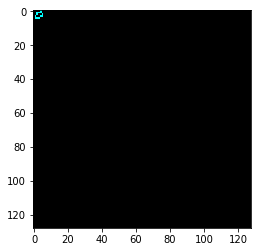

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Draw an arbitray quadilateral
def draw_quadilateral(img, pts):
    pts = pts.reshape((-1,1,2))
    cv2.polylines(img,[pts],True,(0,255,255))
    return img

img = np.zeros((128,128,3), np.uint8)
quad = np.array([[1,4], [2,1], [4,0], [5,3]])
#quad = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)

draw_quadilateral(img, quad)

#plt.figure(figsize=(12,12))
plt.imshow(img)
plt.show()

## Let's write some code for finding the two diagonals

In [25]:
from scipy.spatial import ConvexHull

def draw_quad(img, quad):
    cv2.line(img, tuple(quad[0]), tuple(quad[1]), color=(255,0,0))
    cv2.line(img, tuple(quad[1]), tuple(quad[2]), color=(0,255,0))
    cv2.line(img, tuple(quad[2]), tuple(quad[3]), color=(0,0,255))
    cv2.line(img, tuple(quad[3]), tuple(quad[0]), color=(255,255,0))

def slope(p1, p2):
    """
    Calculates slope of two 2x1 points
    
    Args:
        p1 (2,1): x1, y1
        p2 (2,1): x2, y2
        
    Returns:
        slope (scalar): Slope of the line between the two points
    """
    if p2[0] == p1[0]:
        return np.inf
    else:
        return float(p2[1]-p1[1])/float(p2[0]-p1[0])

def order_pts(pts):
    """
    Takes a list of pts and finds a structured labelling to it
    
    Args:
        pts (4,2): 4x2 list of unordered pts
        
    Returns:
        pts_u (4,2): 4x2 list of ordered pts
    """
    pts_u = pts.copy()
    hull = ConvexHull(pts)
    pts_u = hull.points[hull.vertices]
    print(pts_u.shape)
    
    # This gives us diametrically opposite points
    diag1 = pts_u[0::2]
    diag2 = pts_u[1::2]
    
    diags = [diag1, diag2]
    
    diag_idsx = np.argmax([slope(*list(diag1)), slope(*list(diag2))])
    
    x_idsx = diags[diag_idsx][:,0].argmin()
    
    min_x_1 = diags[diag_idsx][x_idsx]
    
    while not np.array_equal(pts_u[0], min_x_1):
        pts_u = np.roll(pts_u, 1, axis=0)
    
    return pts_u

def random_quadilateral():
    verts = []
    
    for i in xrange(4):
        verts.append([np.random.randint(0,400),np.random.randint(0,400)])
        
    #return np.array(verts)
    return np.array([[0,0], [100,100], [100,0], [0,100]]) + 100

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


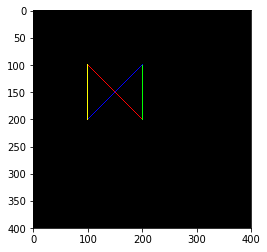

(4, 2)


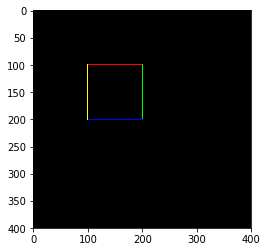

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


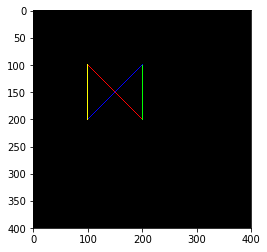

(4, 2)


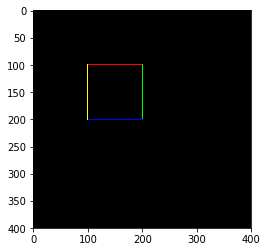

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


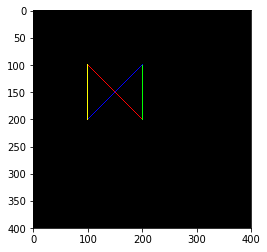

(4, 2)


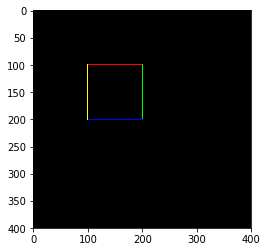

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


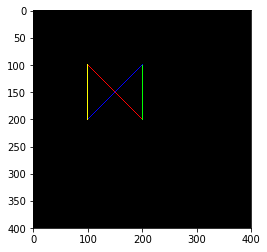

(4, 2)


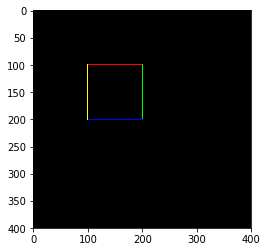

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


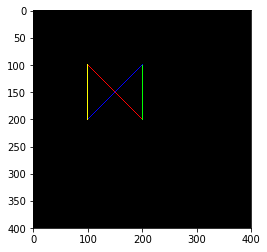

(4, 2)


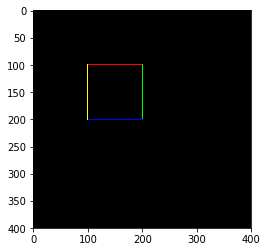

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


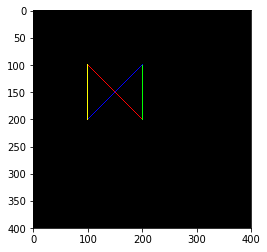

(4, 2)


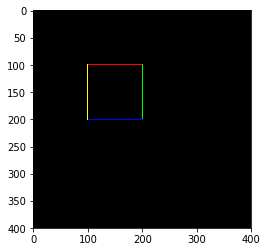

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


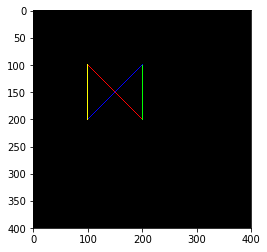

(4, 2)


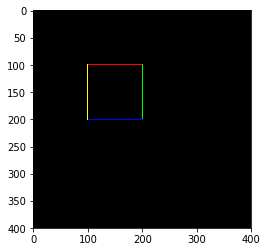

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


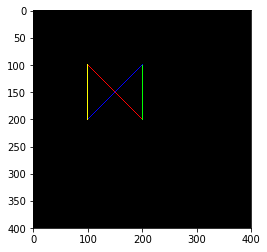

(4, 2)


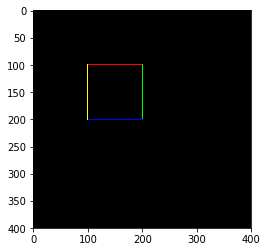

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


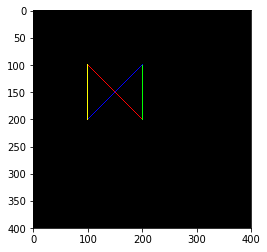

(4, 2)


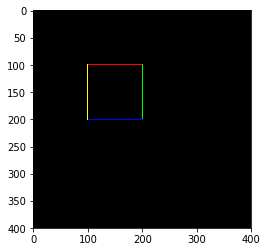

[[100 100]
 [200 200]
 [200 100]
 [100 200]]


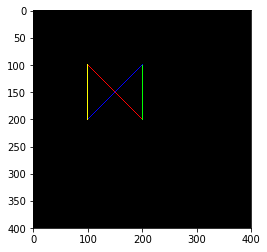

(4, 2)


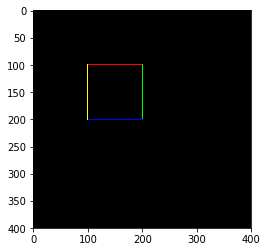

In [26]:
for i in xrange(10):
    try:
    # Generate random quadilateral
        quad = random_quadilateral()
        print(quad)
        img = np.zeros((400,400,3), np.uint8)
        draw_quad(img, quad)
        plt.imshow(img)
        plt.show()

        # Draw quadilateral without ordering
        img_q = np.zeros((400,400,3), np.uint8)

        quad_ordered = order_pts(quad)
        draw_quad(img_q, quad_ordered.astype(np.int64))

        plt.imshow(img_q)
        plt.show()
    except:
        print('error')

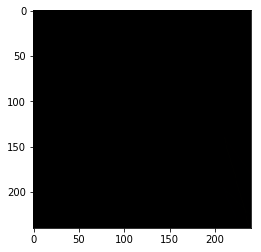

In [14]:
verts = np.array([[0,0], [40,0], [40,40], [0,40]])
img = np.zeros((240,240,3))
draw_quad(img,verts)
plt.imshow(img)
plt.show()

In [10]:
verts.shape

(4, 2)

In [27]:
!git status

On branch pawan_files
Your branch is up-to-date with 'origin/pawan_files'.
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   DDRMOS_network.ipynb
	deleted:    DatasetTensorCreator.ipynb
	deleted:    DenseBoxesFaceDetectionReplication.ipynb
	modified:   TrainingRotation-Pfunctions.ipynb
	deleted:    Untitled.ipynb
	modified:   dataset.py
	modified:   dataset.pyc
	modified:   functions_rotation.pyc
	modified:   network.pyc

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	ReplicatingISDR.ipynb
	SloppyCodeConsistentEncodingPlotCirclesFreeformThoughtsWorkTillTwelveEvenIfTired.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add S